In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import stopwords
import string

In [3]:
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [32]:
input_nation = pd.read_csv('../notebooks/notebook1-result-nation.csv')

In [33]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,content,hour
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,ที่ศูนย์วิทยาศาสตร์การกีฬา การกีฬาแห่งประเทศไท...,12
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,เมื่อเวลา 11.30 น. วันที่ 5 เมษายน ที่ สำนักงา...,12
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,ประธานมูลนิธิสืบนาคะเสถียร นายศศิน เฉลิมลาภ บอ...,12
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,นายทรงพล สวาสดิ์ธรรม ผู้ว่าราชการจังหวัดลำปาง ...,12
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,นายโสภณ ทองดี ผู้ตรวจราชการกระทรวงทรัพยากรธรรม...,12


In [35]:
from stop_words import get_stop_words
en_stop = get_stop_words('en')
num = [str(i) for i in range(1000)]
stop_words = stopwords.words('thai')
stop_words+=[' ']
stop_words+=string.punctuation

In [36]:
def getToken(text):
#     print(text)
    res = word_tokenize(text,engine='deepcut')
    res = [i for i in res if i not in en_stop and i not in num and i not in stop_words]
    return res

In [37]:
input_nation['token'] = input_nation['headline'].apply(getToken)

In [40]:
input_nation['token'] = input_nation['token'].apply(lambda x : x[1:-1].replace("'","").replace(' ',''))

In [15]:
# input_nation['numToken'] = input_nation['token'].apply(lambda x:len(x))

In [46]:
# input_nation.to_csv('Nation-tokenize.csv')

In [39]:
input_nation = pd.read_csv('Nation-tokenize.csv')

In [41]:
input_nation['numToken'] = input_nation['token'].apply(lambda x : len(x.split(',')))

In [42]:
input_nation['numChar'] = input_nation['token'].apply(lambda x: len(x.replace(',','')))

In [44]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)

In [45]:
input_nation.head()

,headline,date,DOW,time,view,like,share,comment,category,tag,content,hour,token,numToken,numChar
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,ที่ศูนย์วิทยาศาสตร์การกีฬา การกีฬาแห่งประเทศไท...,12,"ไทย,ทีม,เยาวชนลุยศึก,เชียร์,ลีด,ดิ้ง,โลก,สหรัฐฯ",8,40
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,เมื่อเวลา 11.30 น. วันที่ 5 เมษายน ที่ สำนักงา...,12,"บิ๊กโจ๊ก,จ่อ,ปิยบุตร,ข้อมูล,ปม,ร้อง",6,30
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,ประธานมูลนิธิสืบนาคะเสถียร นายศศิน เฉลิมลาภ บอ...,12,"ศศิน,ชี้,เปรมชัย,ติด,คุก,เหมาะสม",6,27
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,นายทรงพล สวาสดิ์ธรรม ผู้ว่าราชการจังหวัดลำปาง ...,12,"จิตอาสา,ปรับปรุง,ภูมิทัศน์,รอบ,แหล่ง,น้ำ,ศักดิ...",7,47
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,นายโสภณ ทองดี ผู้ตรวจราชการกระทรวงทรัพยากรธรรม...,12,"คุณภาพ,น้ำ,สงกรานต์,คูเมืองเชียงใหม่,เกณฑ์,พอใช้",6,43


/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


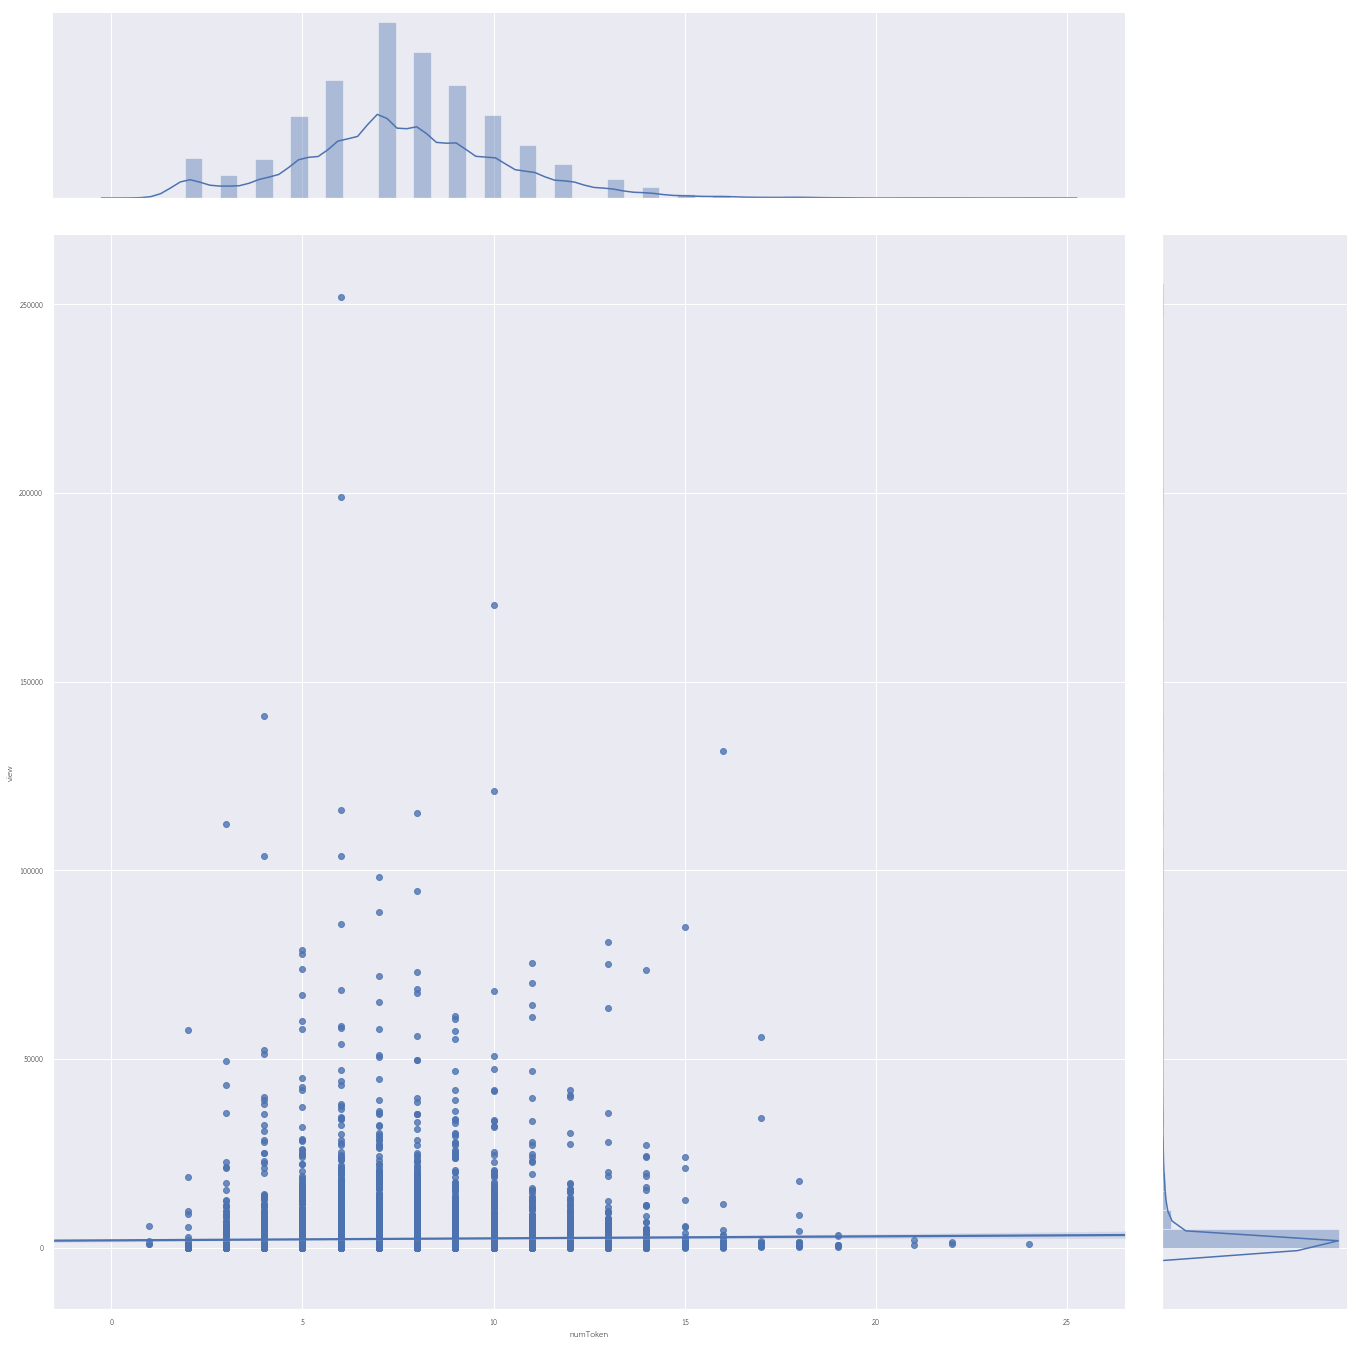

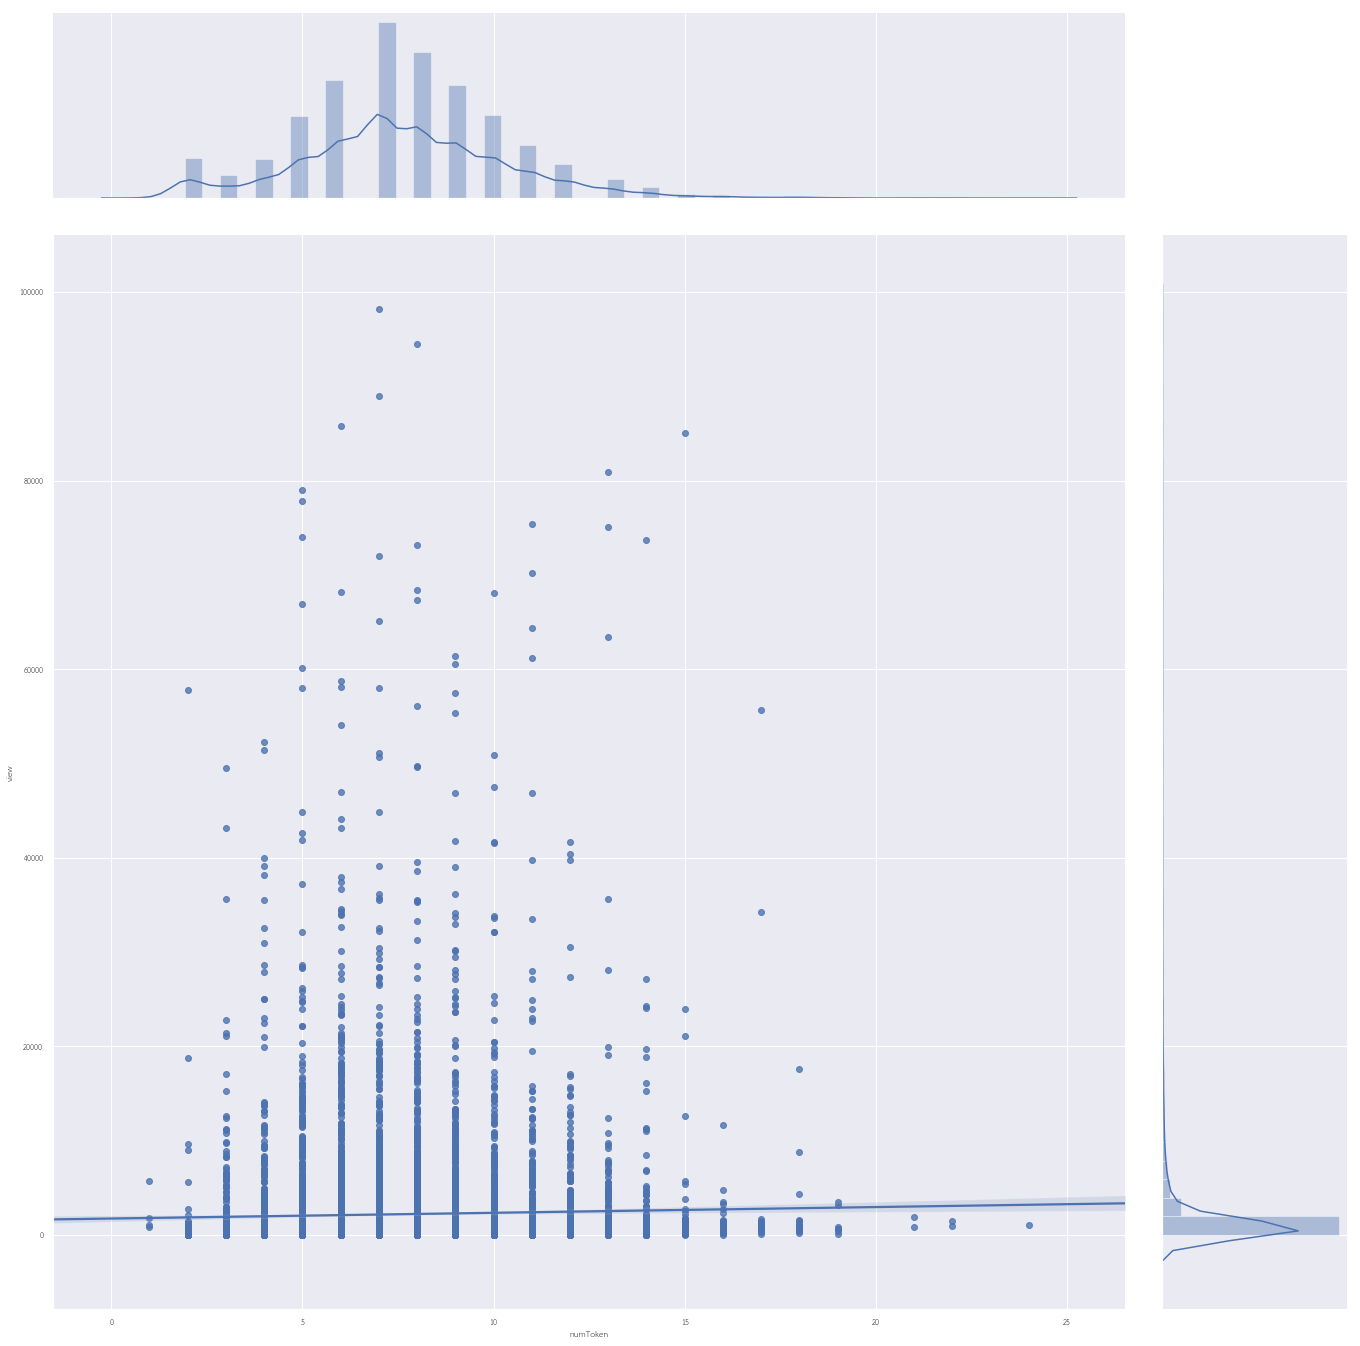

In [47]:
sns.jointplot("numToken", "view", data=input_nation, kind="reg",height=20 )
sns.jointplot("numToken", "view", data=input_nation[input_nation['view']<100000], kind="reg",height=20 )

In [48]:
input_nation.shape

(11794, 15)

In [49]:
IQRval = input_nation['view'].describe().loc['75%']-input_nation['view'].describe().loc['25%']

In [50]:
outlierMin = max(input_nation['view'].describe().loc['25%'],0)
outlierMax = input_nation['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

324.0 3231.5


In [51]:
input_nation_cut = input_nation[(input_nation['view']<=outlierMax) & (input_nation['view']>=outlierMin)]

In [52]:
input_nation_cut[input_nation_cut['numToken']>20]

,headline,date,DOW,time,view,like,share,comment,category,tag,content,hour,token,numToken,numChar
327,พบกระทิงขี้สงสัย!​ ยืนงงหน้ากล้องดักถ่าย เขตรั...,03/04/2562,WED,18:22,1942,NaN,323,NaN,คุณภาพชีวิต,NaN,3 เม.ย.62 - ภาพจากกล้องดักถ่ายสัตว์ป่า จากเขตร...,18,"กระทิง,ขี้,สงสัย,\u200b,ยืน,งง,หน้า,กล้อง,ดัก,...",21,103
4454,ดึง​ 8​ ตำบล​ลุย​ 'ชุมชนจัดการภาวะโลกร้อน'​ 5​...,11/03/2562,MON,12:36,936,NaN,62,NaN,คุณภาพชีวิต,NaN,11 มี.ค.62 - ผู้อำนวยการสำนักสนับสนุนสุขภาวะชุ...,12,"ดึง,\u200b,\u200b,ตำบล,\u200b,ลุย,\u200b,ชุมชน...",22,105
9463,"ดีเดย์รถเมล์​ 2,075 คันใช้​ B20​ พรุ่งนี้​ (1​...",31/01/2562,THU,11:36,794,NaN,130,NaN,เศรษฐกิจ,NaN,31 ม.ค. 62 - รัฐมนตรีว่าการกระทรวงพลังงาน ศิริ...,11,"ดีเดย์,รถ,เมล์,\u200b,075,คัน,\u200b,B,\u200b,...",21,92
9757,"ส.บอล​ ตั้ง​ ""โค้ชโต่ย""​ เฮดโค้ช​ ""โชค​ทวี""​ ผ...",29/01/2562,TUE,14:23,1054,NaN,186,NaN,กีฬา,NaN,ด้วย สมาคมกีฬาฟุตบอลแห่งประเทศไทย ในพระบรมราชู...,14,"ส.บอล,\u200b,\u200b,โค้ช,โต่ย,\u200b,เฮดโค้ช,\...",24,111
11164,6​ เดือนหลัง​ 13​ หมูป่าติดถ้ำหลวง นทท.พุ่ง​ 1...,19/01/2562,SAT,19:00,1462,NaN,846,NaN,เศรษฐกิจ,NaN,ผู้สื่อข่าว เนชั่นทีวี วชิรวิทย์ เลิศบำรุงชัย ...,19,"\u200b,เดือน,\u200b,\u200b,หมู,ป่า,ติด,ถ้ำหลวง...",22,113


In [53]:
input_nation_cut['numToken'].describe()

count    7319.000000
mean        8.008744
std         2.522255
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        24.000000
Name: numToken, dtype: float64

In [54]:
input_nation_cut['numChar'].describe()

count    7319.000000
mean       38.677142
std        11.617280
min         3.000000
25%        31.000000
50%        38.000000
75%        45.000000
max       114.000000
Name: numChar, dtype: float64

In [55]:
input_nation_cut['view'].describe()

count    7319.000000
mean     1008.271349
std       658.803808
min       324.000000
25%       530.000000
50%       775.000000
75%      1269.000000
max      3231.000000
Name: view, dtype: float64

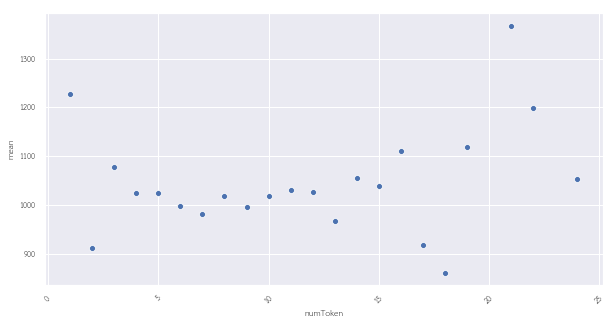

In [56]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numToken", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['numToken'])['view'].describe()).reset_index())

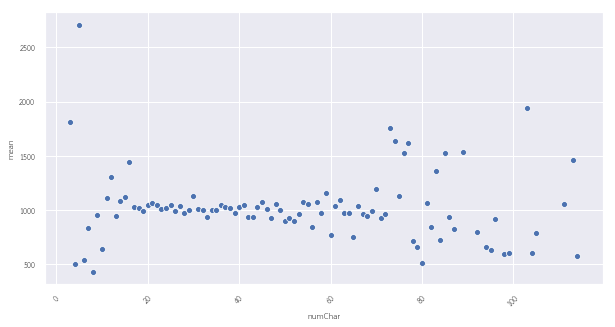

In [57]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numChar", y="mean", data=pd.DataFrame(
    input_nation_cut.groupby(['numChar'])['view'].describe()).reset_index())



## Include stop words

In [26]:
input_nation = pd.read_csv('notebook1-result-nation.csv')

In [27]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
from stop_words import get_stop_words
num = [str(i) for i in range(1000)]
stop_words =[' ']
stop_words+=string.punctuation

In [29]:
def getToken(text):
#     print(text)
    res = word_tokenize(text,engine='deepcut')
    res = [i for i in res if i not in num and i not in stop_words]
    return res

In [30]:
input_nation['token'] = input_nation['headline'].apply(getToken)

In [55]:
input_nation['token'] = input_nation['token'].apply(lambda x : x[1:-1].replace("'","").replace(' ',''))

In [56]:
# input_nation.to_csv('Nation-tokenize_include_stop.csv')

In [57]:
input_nation = pd.read_csv('Nation-tokenize_include_stop.csv')

In [58]:
input_nation['numToken'] = input_nation['token'].apply(lambda x : len(x.split(',')))

In [59]:
input_nation['numChar'] = input_nation['token'].apply(lambda x: len(x.replace(',','')))

In [60]:
input_nation.head()

,Unnamed: 0,Unnamed: 0.1,headline,date,DOW,time,view,like,share,comment,category,tag,hour,token,numToken,numChar
0,0,0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,05/04/2562,FRI,12:15,494,NaN,86,NaN,กีฬา,NaN,12,"ไทย,ส่ง,ทีม,เยาวชนลุยศึก,เชียร์,ลีด,ดิ้ง,โลก,ท...",10,46
1,1,1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",05/04/2562,FRI,12:16,1250,NaN,797,NaN,อาชญากรรม,NaN,12,"บิ๊กโจ๊ก,จ่อ,เรียก,ปิยบุตร,ให้,ข้อมูล,ปม,ถูก,ร้อง",9,41
2,2,2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",05/04/2562,FRI,12:06,755,NaN,354,NaN,คุณภาพชีวิต,NaN,12,"ศศิน,ชี้,เปรมชัย,ต้อง,ติด,คุก,จึง,จะ,เหมาะสม",9,36
3,3,3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,05/04/2562,FRI,12:02,232,NaN,4,NaN,ภูมิภาค,NaN,12,"จิตอาสา,ปรับปรุง,ภูมิทัศน์,รอบ,แหล่ง,น้ำ,ศักดิ...",7,47
4,4,4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,05/04/2562,FRI,12:04,298,NaN,36,NaN,คุณภาพชีวิต,NaN,12,"คุณภาพ,น้ำ,สงกรานต์,คูเมืองเชียงใหม่,เกณฑ์,พอใช้",6,43


In [36]:
IQRval = input_nation['view'].describe().loc['75%']-input_nation['view'].describe().loc['25%']

In [37]:
outlierMin = max(input_nation['view'].describe().loc['25%']-1.5*IQRval,0)
outlierMax = input_nation['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

0 3516.75


In [61]:
input_nation_cut = input_nation[(input_nation['view']<=outlierMax) & (input_nation['view']>=outlierMin)]

In [65]:
input_nation_cut['numToken'].describe()

count    5049.000000
mean       10.602496
std         3.462592
min         2.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        28.000000
Name: numToken, dtype: float64

In [62]:
input_nation_cut['numChar'].describe()

count    5049.000000
mean       47.591206
std        14.388708
min        12.000000
25%        38.000000
50%        47.000000
75%        55.000000
max       123.000000
Name: numChar, dtype: float64

In [66]:
input_nation_cut['view'].describe()

count    5049.000000
mean      771.877005
std       731.646899
min         0.000000
25%       255.000000
50%       545.000000
75%      1020.000000
max      3514.000000
Name: view, dtype: float64

/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


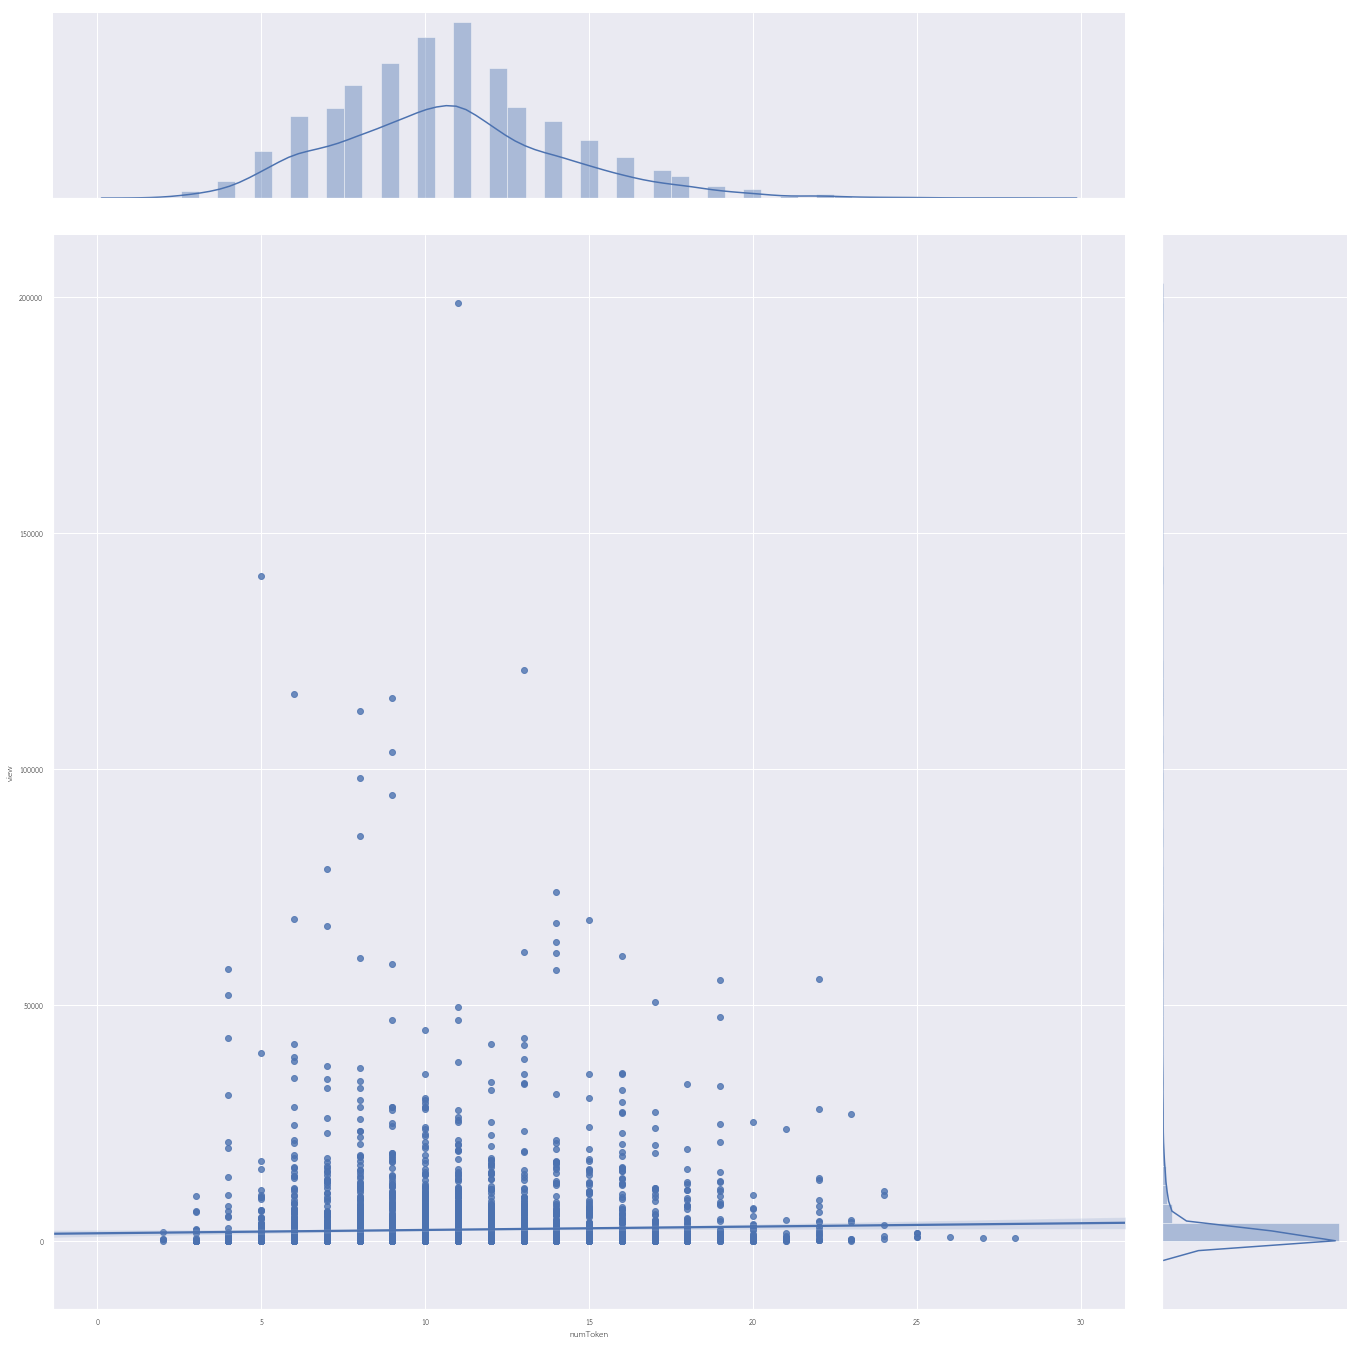

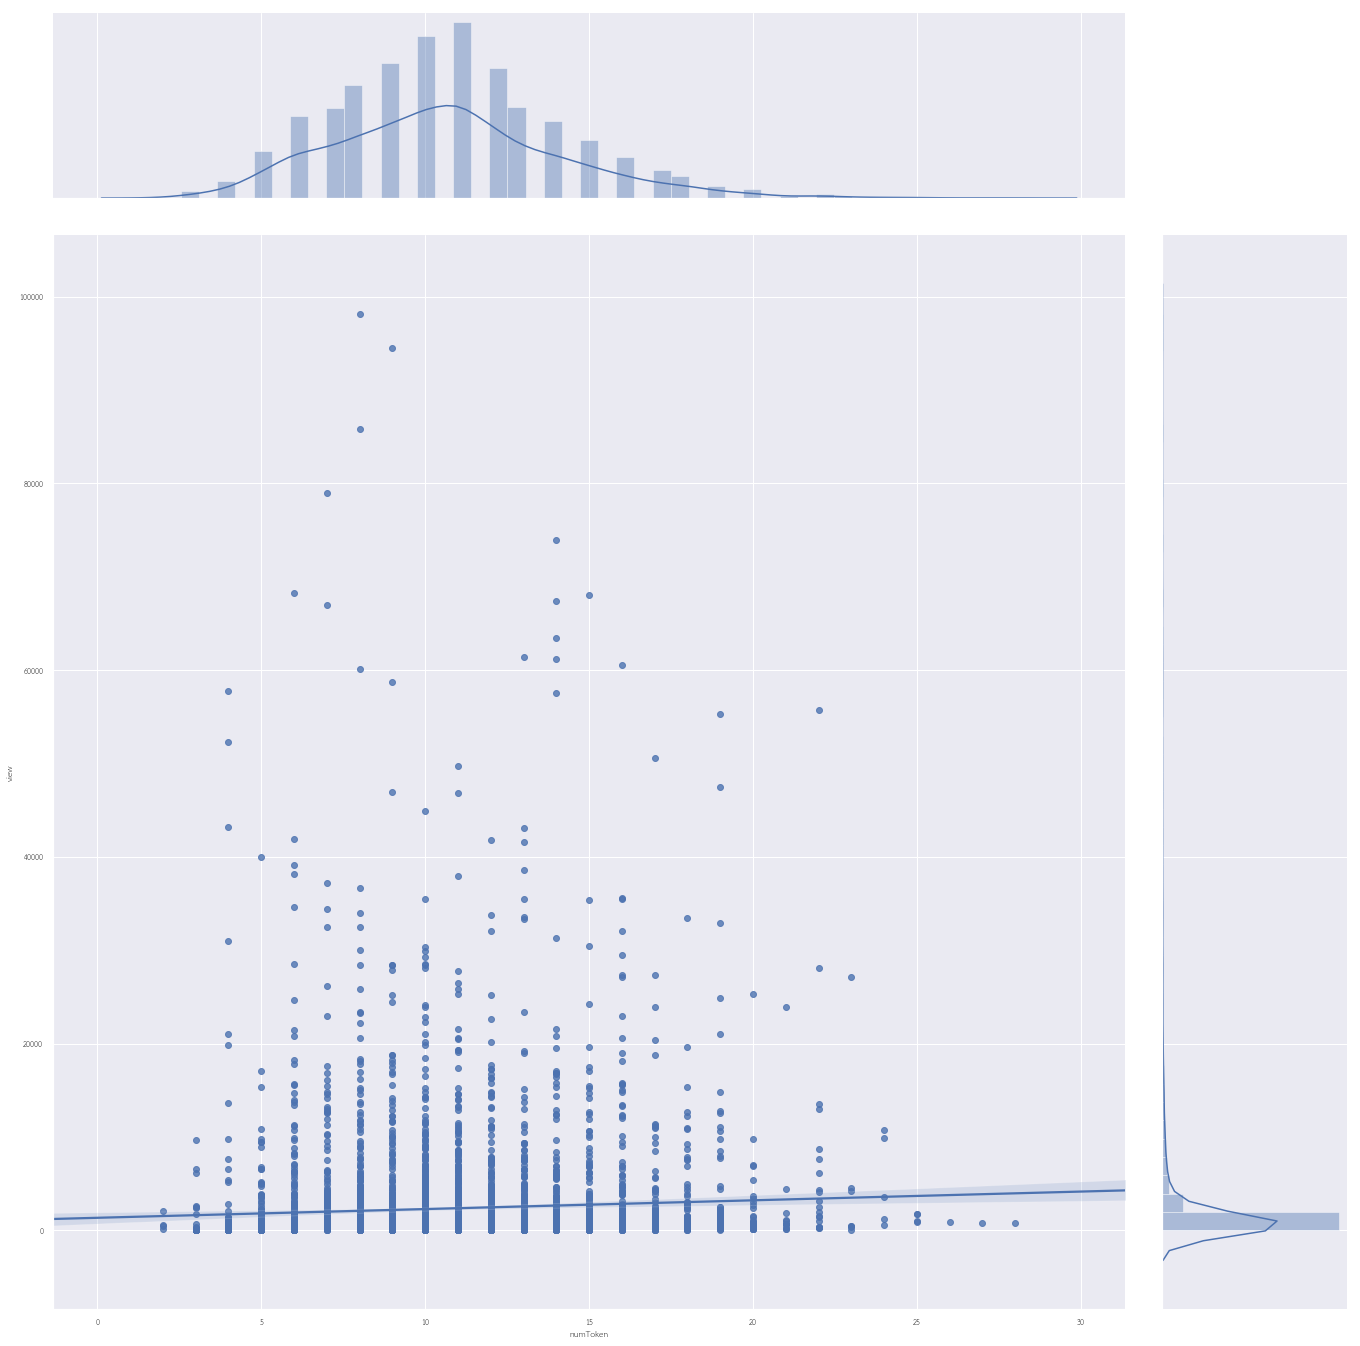

In [39]:
sns.jointplot("numToken", "view", data=input_nation, kind="reg",height=20 )
sns.jointplot("numToken", "view", data=input_nation[input_nation['view']<100000], kind="reg",height=20 )

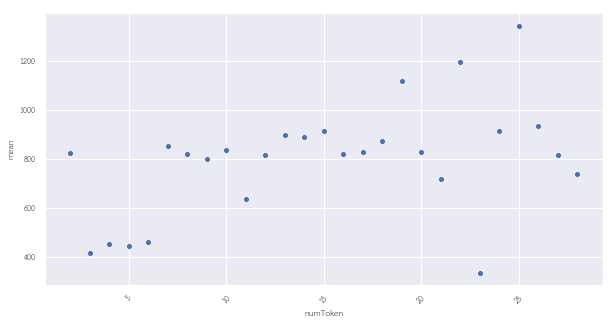

In [40]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numToken", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['numToken'])['view'].describe()).reset_index())

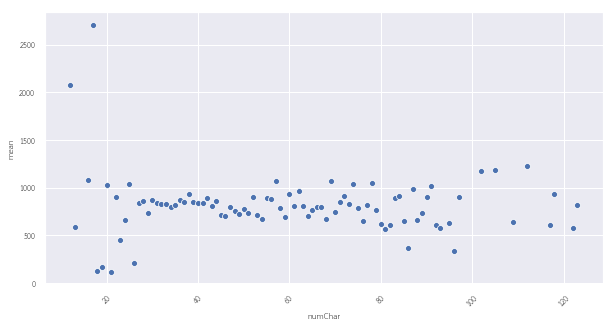

In [63]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(x="numChar", y="mean", data=pd.DataFrame(input_nation_cut.groupby(['numChar'])['view'].describe()).reset_index())